In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import correlation
import random

random.seed(42);

In [52]:
folder = "files/"
sentiments = pd.read_csv(folder + "sentimented_tweets_with_stopwords.csv")
stocks = pd.read_csv(folder + "clean_stocks.csv")

In [53]:
model = Top2Vec(list(sentiments.tweet), embedding_model='universal-sentence-encoder-multilingual')
topic_sizes, topic_nums = model.get_topic_sizes()
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["tesla"], num_topics=10)
topic_words[:3]

2021-12-03 16:01:58,903 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/home/maksat.kengeskanov/.conda/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2021-12-03 16:01:59,393 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2021-12-03 16:02:01,686 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-12-03 16:02:03,432 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-12-03 16:02:12,815 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:F

[array(['tesla', 'teslaownerssv', 'teslamotors', 'autopilot', 'teslarati',
        'electric', 'test', 'testing', 'solar', 'auto', 'battery',
        'thirdrowtesla', 'cars', 'mayemusk', 'evafoxu', 'false', 'spacex',
        'amp', 'rocket', 'raptor', 'vehicle', 'nichegamer', 'car',
        'carmack', 'wow', 'moon', 'driving', 'kristennetten', 'power',
        'fsd', 'truth', 'model', 'flcnhvy', 'fredericlambert', 'max',
        'annerajb', 'km', 'dmc', 'yet', 'giga', 'true', 'owners',
        'production', 'erdayastronaut', 'free', 'future', 'wrong', 'drive',
        'maybe', 'miles'], dtype='<U15'),
 array(['ll', 'teslarati', 'doesn', 'isn', 're', 'don', 'wow', 'imo',
        'get', 'ai', 'out', 'sn', 'it', 'do', 'djsnm', 'be', 'well',
        'didn', 'way', 'the', 'over', 'own', 'been', 'far', 'la', 'its',
        'away', 'mayemusk', 'made', 'off', 'take', 'like', 'an', 'getting',
        'about', 'cape', 'called', 'thrust', 'up', 'looks', 'aa', 'being',
        'come', 'those', 'se

In [54]:
print("Topic Scores:", topic_scores)
print("Topics Nums:", topic_nums)
tesla = pd.DataFrame(columns = ['tweet', 'score', 'id'])
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic_nums[0], num_docs = topic_sizes[topic_nums[0]])
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    tesla = tesla.append({'tweet': doc, 'score': score, 'id': doc_id}, ignore_index = True)
tesla.head()

Topic Scores: [0.78880257 0.54633982 0.44080085 0.3810223  0.38092933 0.3781702
 0.35122141 0.3478661  0.3465857  0.33648936]
Topics Nums: [ 1 12  5  2 82 11 19  8 41 52]


,tweet,score,id
0,teslaownersSV Teslatunity Tesla Absolutely,0.907911,4590
1,TeslaOwnersSK Tesla Sorry it took so long,0.892488,4518
2,teslaownersSV Tesla Whoa cool,0.886003,5569
3,tesla adri teslaownersSV Yes,0.882634,631
4,PPathole teslaownersSV tesla raj Yes,0.878822,1105


In [55]:
t2v_best = sentiments.merge(tesla, on ="tweet", how = "inner")
t2v_best.head()

,date,tweet,language,hashtags,cashtags,link,retweet,nlikes,nreplies,nretweets,reply_to,textblob_sentiment,bertweet_sentiment,distilbert_sentiment,score,id
0,2021-03-19 06:08:53,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1372792170...,False,3143,189,128,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",0,0,1,0.774933,5524
1,2021-03-19 06:08:53,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1372792170...,False,3143,189,128,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",0,0,1,0.774933,25
2,2019-06-01 00:03:04,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1134611281...,False,2362,57,42,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",0,0,1,0.774933,5524
3,2019-06-01 00:03:04,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1134611281...,False,2362,57,42,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",0,0,1,0.774933,25
4,2021-03-11 13:53:21,tesla adri delayslater TrevorMahlmann SpacePad...,de,[],[],https://twitter.com/elonmusk/status/1370009954...,False,2539,246,115,"[{'screen_name': 'tesla_adri', 'name': 'Tesla_...",0,0,-1,0.670473,70


In [56]:
t2v_best.date = pd.to_datetime(t2v_best.date).dt.normalize()
stocks.date = pd.to_datetime(stocks.date)
df = pd.merge(t2v_best, stocks, on = 'date', how = 'inner')
df['top2vec'] = 1
df.head()

,date,tweet,language,hashtags,cashtags,link,retweet,nlikes,nreplies,nretweets,...,bertweet_sentiment,distilbert_sentiment,score,id,open,high,low,close,adj,top2vec
0,2021-03-19,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1372792170...,False,3143,189,128,...,0,1,0.774933,5524,646.599976,657.22998,624.619995,654.869995,654.869995,1
1,2021-03-19,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1372792170...,False,3143,189,128,...,0,1,0.774933,25,646.599976,657.22998,624.619995,654.869995,654.869995,1
2,2019-06-01,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1134611281...,False,2362,57,42,...,0,1,0.774933,5524,37.061001,37.66000,36.109000,36.413000,36.413000,1
3,2019-06-01,teslaownersSV,und,[],[],https://twitter.com/elonmusk/status/1134611281...,False,2362,57,42,...,0,1,0.774933,25,37.061001,37.66000,36.109000,36.413000,36.413000,1
4,2019-06-01,tesla truth Read it on BBCScienceNews,en,[],[],https://twitter.com/elonmusk/status/1134611776...,False,41682,965,8187,...,0,-1,0.686352,5523,37.061001,37.66000,36.109000,36.413000,36.413000,1


In [57]:
methods = ['top2vec']
cramer = correlation.find_correlation(df, methods).sort_values('cramer', ascending=False).reset_index(drop = True)
cramer['size'] = df.shape[0]
cramer

,method,cluster,type,cramer,percent_change,delay,size
0,top2vec,1,bertweet_sentiment,0.09792,1,1,1179
1,top2vec,1,bertweet_sentiment,0.08676,0.5,1,1179
2,top2vec,1,bertweet_sentiment,0.08312,1.5,1,1179
3,top2vec,1,bertweet_sentiment,0.07063,0.5,3,1179
4,top2vec,1,bertweet_sentiment,0.07002,0,1,1179
5,top2vec,1,bertweet_sentiment,0.06996,0.5,2,1179
6,top2vec,1,bertweet_sentiment,0.06774,2,1,1179
7,top2vec,1,bertweet_sentiment,0.06464,2,2,1179
8,top2vec,1,bertweet_sentiment,0.06271,1.5,2,1179
9,top2vec,1,textblob_sentiment,0.06124,0,1,1179


dict_keys(['Tesla', 'will', 'teslaownersSV', 'car', 'amp', 's', 'Thank', 'tesla truth', 'Tesla Yes', 'Sure', 'year', 'flcnhvy', 'great', 'TeslaMotors', 'Good', 'time', 're', 'U', 'Ok', 'Tesla team', 'Model S', 'new', 'Tesla Model', 'team', 'V', 'make', 'Yeah', 'Haha', 'Maybe', 'day', 'work', 'people', 'Teslarati', 'one', 'soon', 't', 'probably', 'Erdayastronaut', 'lot', 'mile', 'cleantechnica', 'week', 'working', 'Exactly', 'Tesla owner', 'price', 'Coming soon', 'now', 'even', 'true'])


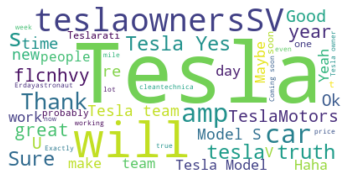

In [58]:
correlation.generate_wordcloud(df, 'top2vec', 1)